In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [2]:
columnames = ["ID", "Age", "Experience", "Income","ZIP Code", "Family", "CCAvg", "Education", "Mortgage" "Personal Loan", "Securities Account","CD Account","Online","CreditCard"]


In [3]:
therabnk_df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
therabnk_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [25]:
therabnk_df.drop(["ZIP Code"], axis = 1, inplace = True)
#dropped column ZIP Code as its has no relevance to data

KeyError: "['ZIP Code'] not found in axis"

In [26]:
therabnk_df

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,4,1.00,2,0,0,0,0,0,1
5,6,37,13,29,4,0.40,2,155,0,0,0,1,0
6,7,53,27,72,2,1.50,2,0,0,0,0,1,0
7,8,50,24,22,1,0.30,3,0,0,0,0,0,1
8,9,35,10,81,3,0.60,2,104,0,0,0,1,0
9,10,34,9,180,1,8.90,3,0,1,0,0,0,0


In [27]:
therabnk_df.shape

(5000, 13)

In [28]:
therabnk_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [34]:
therabnk_df["Experience"] = therabnk_df["Experience"] .abs()

In [35]:
therabnk_df["Experience"]

0        1
1       19
2       15
3        9
4        8
5       13
6       27
7       24
8       10
9        9
10      39
11       5
12      23
13      32
14      41
15      30
16      14
17      18
18      21
19      28
20      31
21      27
22       5
23      18
24      11
25      19
26      16
27      20
28      30
29      13
        ..
4970    13
4971    28
4972    32
4973     1
4974    33
4975    11
4976     5
4977    15
4978    27
4979    26
4980     5
4981     9
4982    10
4983    26
4984     1
4985    23
4986     6
4987    23
4988     8
4989     0
4990    25
4991    25
4992     5
4993    21
4994    40
4995     3
4996     4
4997    39
4998    40
4999     4
Name: Experience, Length: 5000, dtype: int64

In [36]:
therabnk_df.describe()


,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [38]:
therabnk_df.corr()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008202,-0.017695,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.993991,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008202,0.993991,1.000000,-0.046876,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.017695,-0.055269,-0.046876,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.016797,-0.046418,-0.051851,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049738,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013919,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.011097,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.008304,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.016972,-0.000436,-0.000989,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


In [ ]:
#There is higher correleation between Age and Experience. WE can analysed based on any one. I would prefer to analyse based on experience. 
# Hence dropping Age

In [39]:
therabnk_df.drop(["Age"], axis = 1, inplace = True)

In [41]:
therabnk_df.head()

,ID,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,1,49,4,1.6,1,0,0,1,0,0,0
1,2,19,34,3,1.5,1,0,0,1,0,0,0
2,3,15,11,1,1.0,1,0,0,0,0,0,0
3,4,9,100,1,2.7,2,0,0,0,0,0,0
4,5,8,45,4,1.0,2,0,0,0,0,0,1


In [42]:
therabnk_df.corr()

,ID,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008202,-0.017695,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Experience,-0.008202,1.000000,-0.046876,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.017695,-0.046876,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.016797,-0.051851,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.049738,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.013919,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.011097,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.008304,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.016972,-0.000989,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,-0.006909,0.009735,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


In [ ]:
#relationship between Personal Loan and Income can be used to identify the potential customers who have higher probability of purchasing the loan
# We can also explore the same between Personal Loan and Education, MOrtgage and CC Avg and CD Account

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from    scipy.stats             import  ttest_1samp,ttest_ind, wilcoxon, ttest_ind_from_stats
import  scipy.stats             as      stats  
from    statsmodels.stats.power import  ttest_power
import  matplotlib.pyplot       as      plt
from sklearn.ensemble import ExtraTreesClassifier

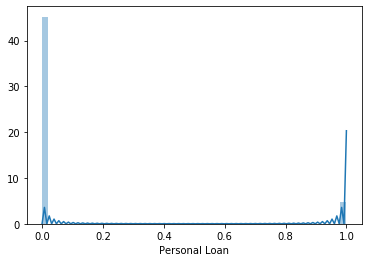

In [45]:
sns.distplot(therabnk_df['Personal Loan'])

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
therabnk_df.groupby(["Personal Loan"]).count()

,ID,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480


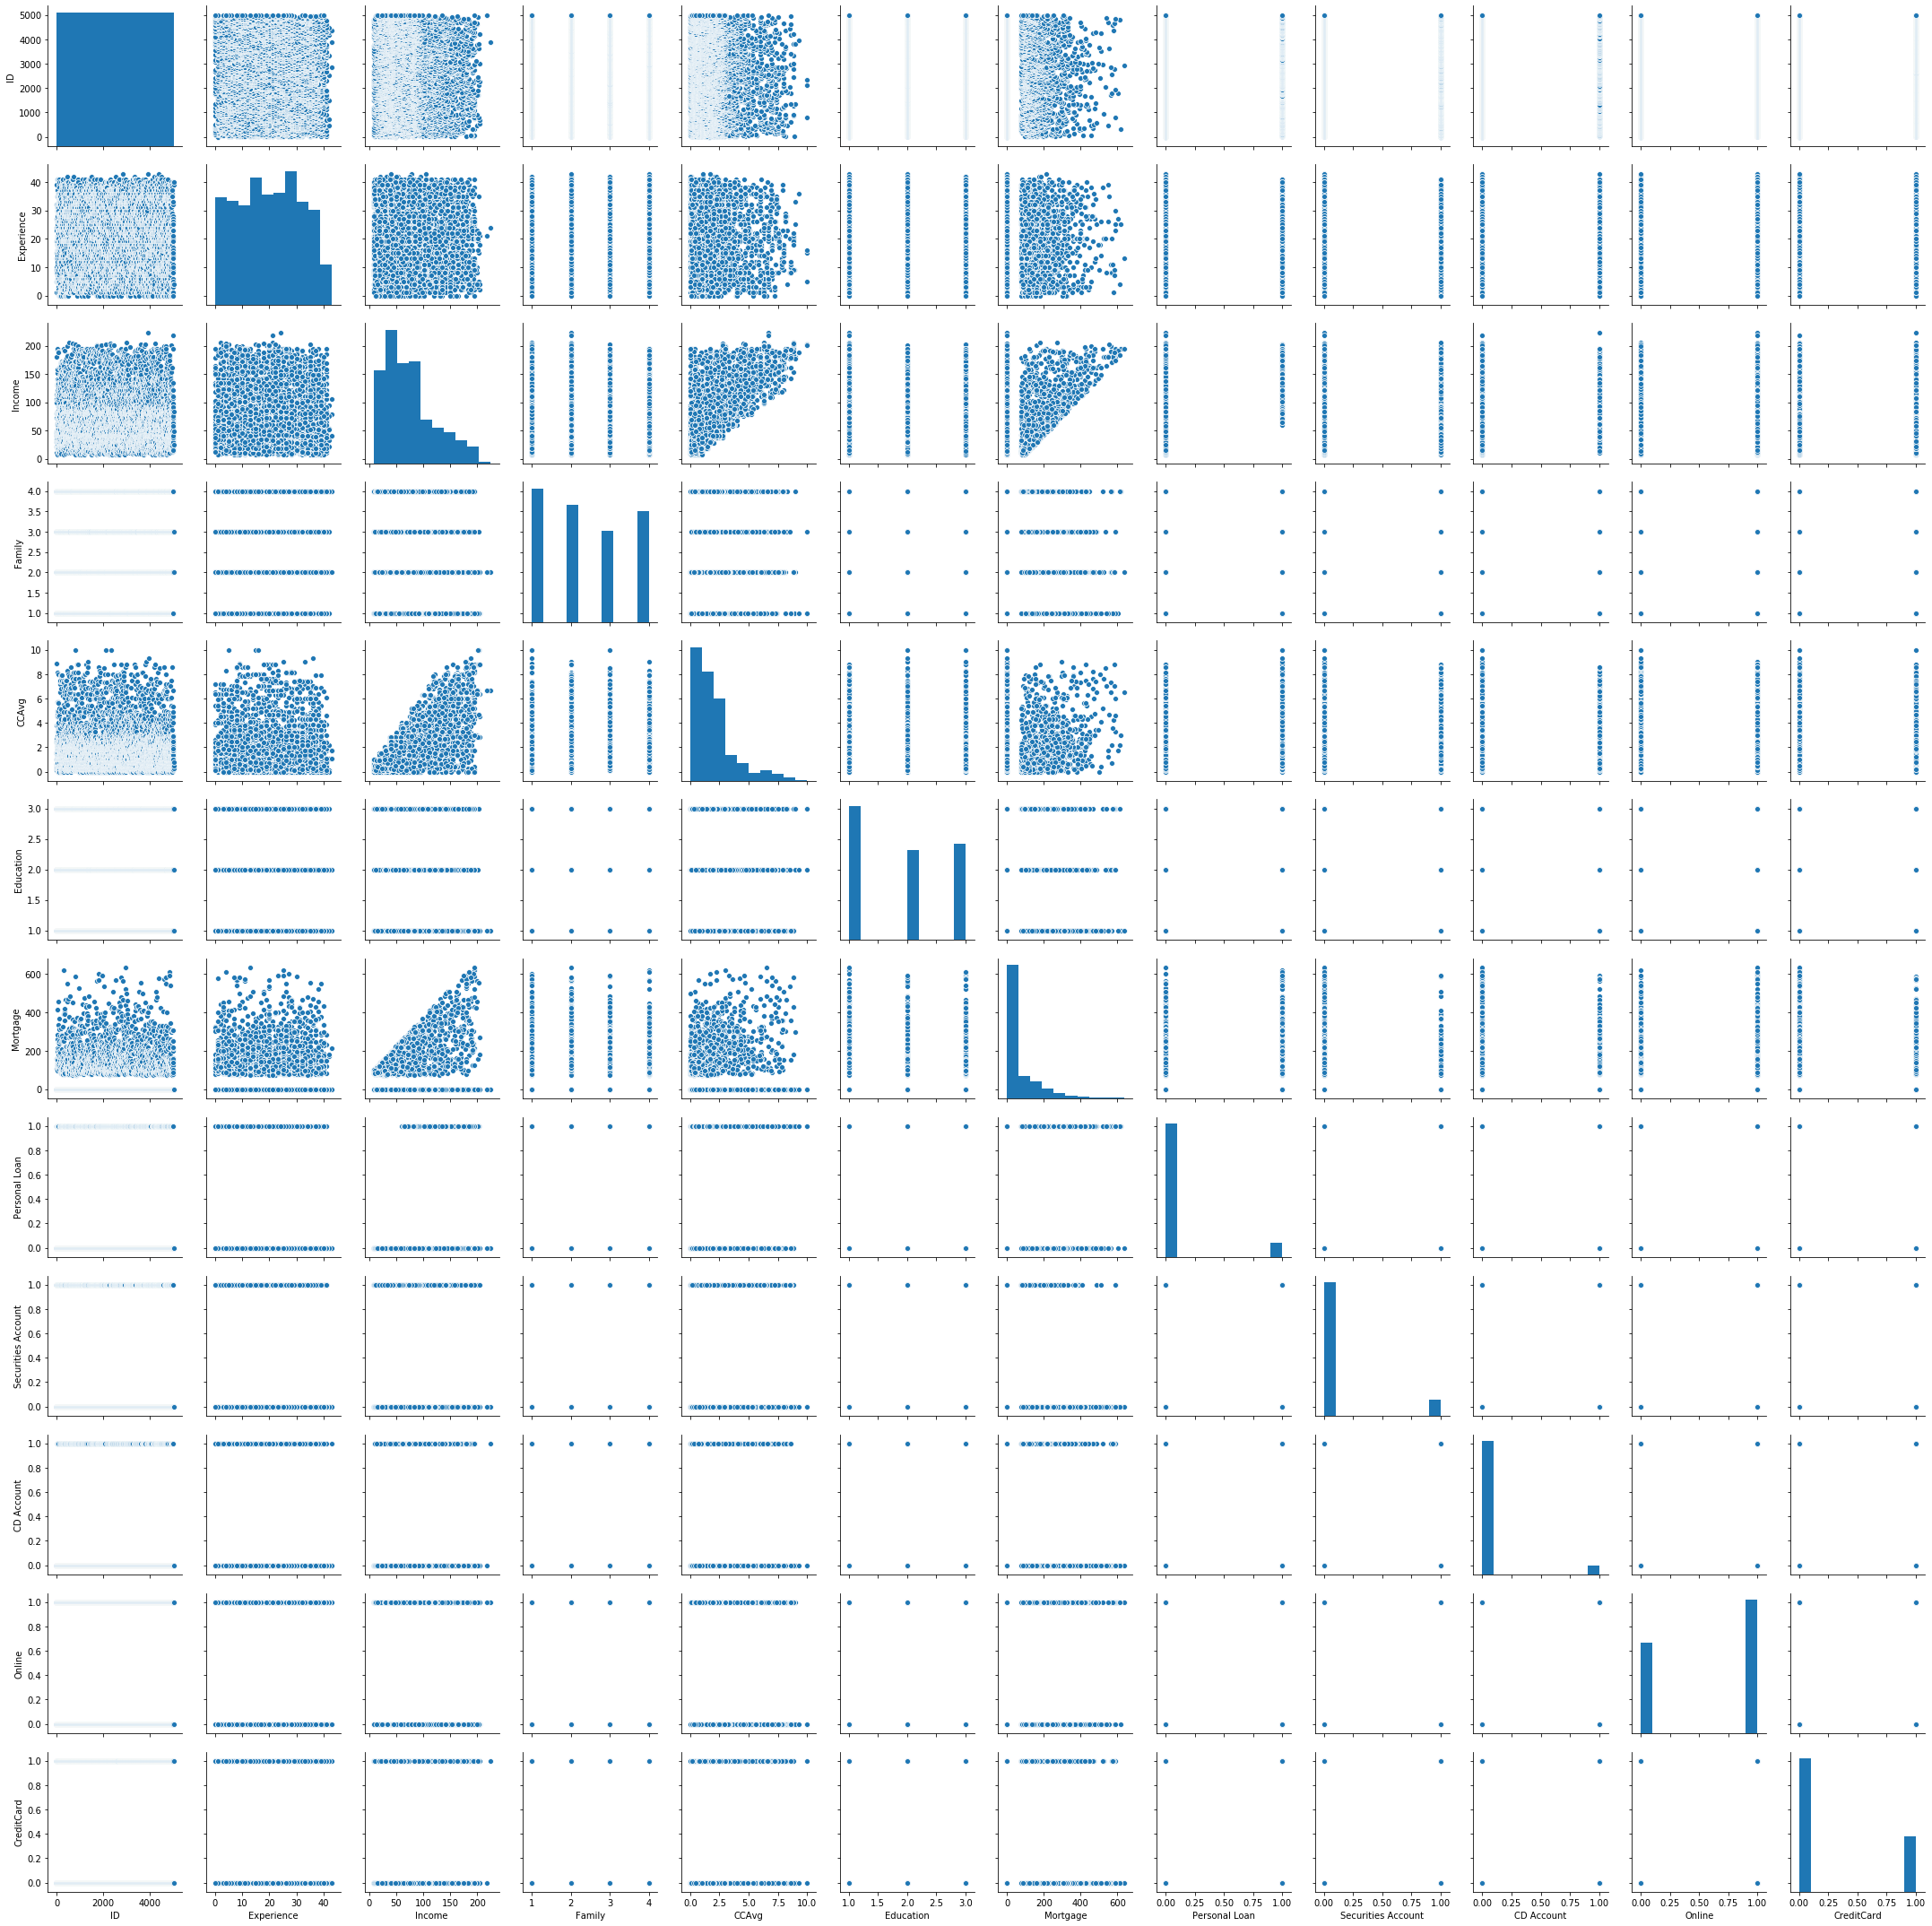

In [48]:
sns.pairplot(therabnk_df)

In [49]:
therabnk_df.shape

(5000, 12)

In [56]:
therabnk_df.head()

,ID,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,1,49,4,1.6,1,0,0,1,0,0,0
1,2,19,34,3,1.5,1,0,0,1,0,0,0
2,3,15,11,1,1.0,1,0,0,0,0,0,0
3,4,9,100,1,2.7,2,0,0,0,0,0,0
4,5,8,45,4,1.0,2,0,0,0,0,0,1


In [74]:
array = therabnk_df.values
X = array[:,1:11] # select all rows and 11 columns which are the attributes
Y = array[:,11]   # select all rows and the 8th column which is the classification 1 or 0 for Personal Loan
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)
X

array([[ 1., 49.,  4., ...,  1.,  0.,  0.],
       [19., 34.,  3., ...,  1.,  0.,  0.],
       [15., 11.,  1., ...,  0.,  0.,  0.],
       ...,
       [39., 24.,  2., ...,  0.,  0.,  0.],
       [40., 49.,  3., ...,  0.,  0.,  1.],
       [ 4., 83.,  3., ...,  0.,  0.,  1.]])

In [75]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.7433333333333333
[[1036   15]
 [ 370   79]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [76]:
model_score = model.score(X_train, y_train)
print(model_score)

0.7422857142857143


In [ ]:
# Improve the model -----------------------------Iteration 2 -----------------------------------------------

In [77]:
# To scale the dimensions we need scale function which is part of sckikit preprocessing libraries

from sklearn import preprocessing

X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [78]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_predict = model.predict(X_test_scaled)
model_score = model.score(X_test_scaled, y_test)
print(model_score)


# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_predict))

0.7433333333333333
[[1036   15]
 [ 370   79]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
#KNN Model

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [80]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [82]:
therabnk_df_z = therabnk_df.apply(zscore)  # convert all attributes to Z scale 

therabnk_df_z.describe()

,ID,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,-2.047251e-17,1.001421e-16,1.939449e-16,7.850609e-16,-2.078338e-17,-6.315837e-16,2.810197e-16,-5.565326e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.731704e+00,-1.764019e+00,-1.428969e+00,-1.216855e+00,-1.108987e+00,-1.049078e+00,-5.555239e-01,-3.258753e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
25%,-8.658522e-01,-8.879059e-01,-7.554825e-01,-1.216855e+00,-7.084116e-01,-1.049078e+00,-5.555239e-01,-3.258753e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
50%,0.000000e+00,-1.179249e-02,-2.123482e-01,-3.454321e-01,-2.506106e-01,1.417029e-01,-5.555239e-01,-3.258753e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01
75%,8.658522e-01,8.643209e-01,5.263146e-01,5.259909e-01,3.216407e-01,1.332484e+00,4.375576e-01,-3.258753e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00
max,1.731704e+00,2.003268e+00,3.263712e+00,1.397414e+00,4.613525e+00,1.332484e+00,5.688108e+00,3.068659e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00


In [86]:
therabnk_df_label = therabnk_df["Personal Loan"]

In [87]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [88]:
X = np.array(therabnk_df_z)
X.shape


(5000, 12)

In [89]:
y = np.array(therabnk_df_label)
y.shape

(5000,)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [91]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [92]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

1.0

In [93]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test, predicted_labels))

[[1351    0]
 [   0  149]]


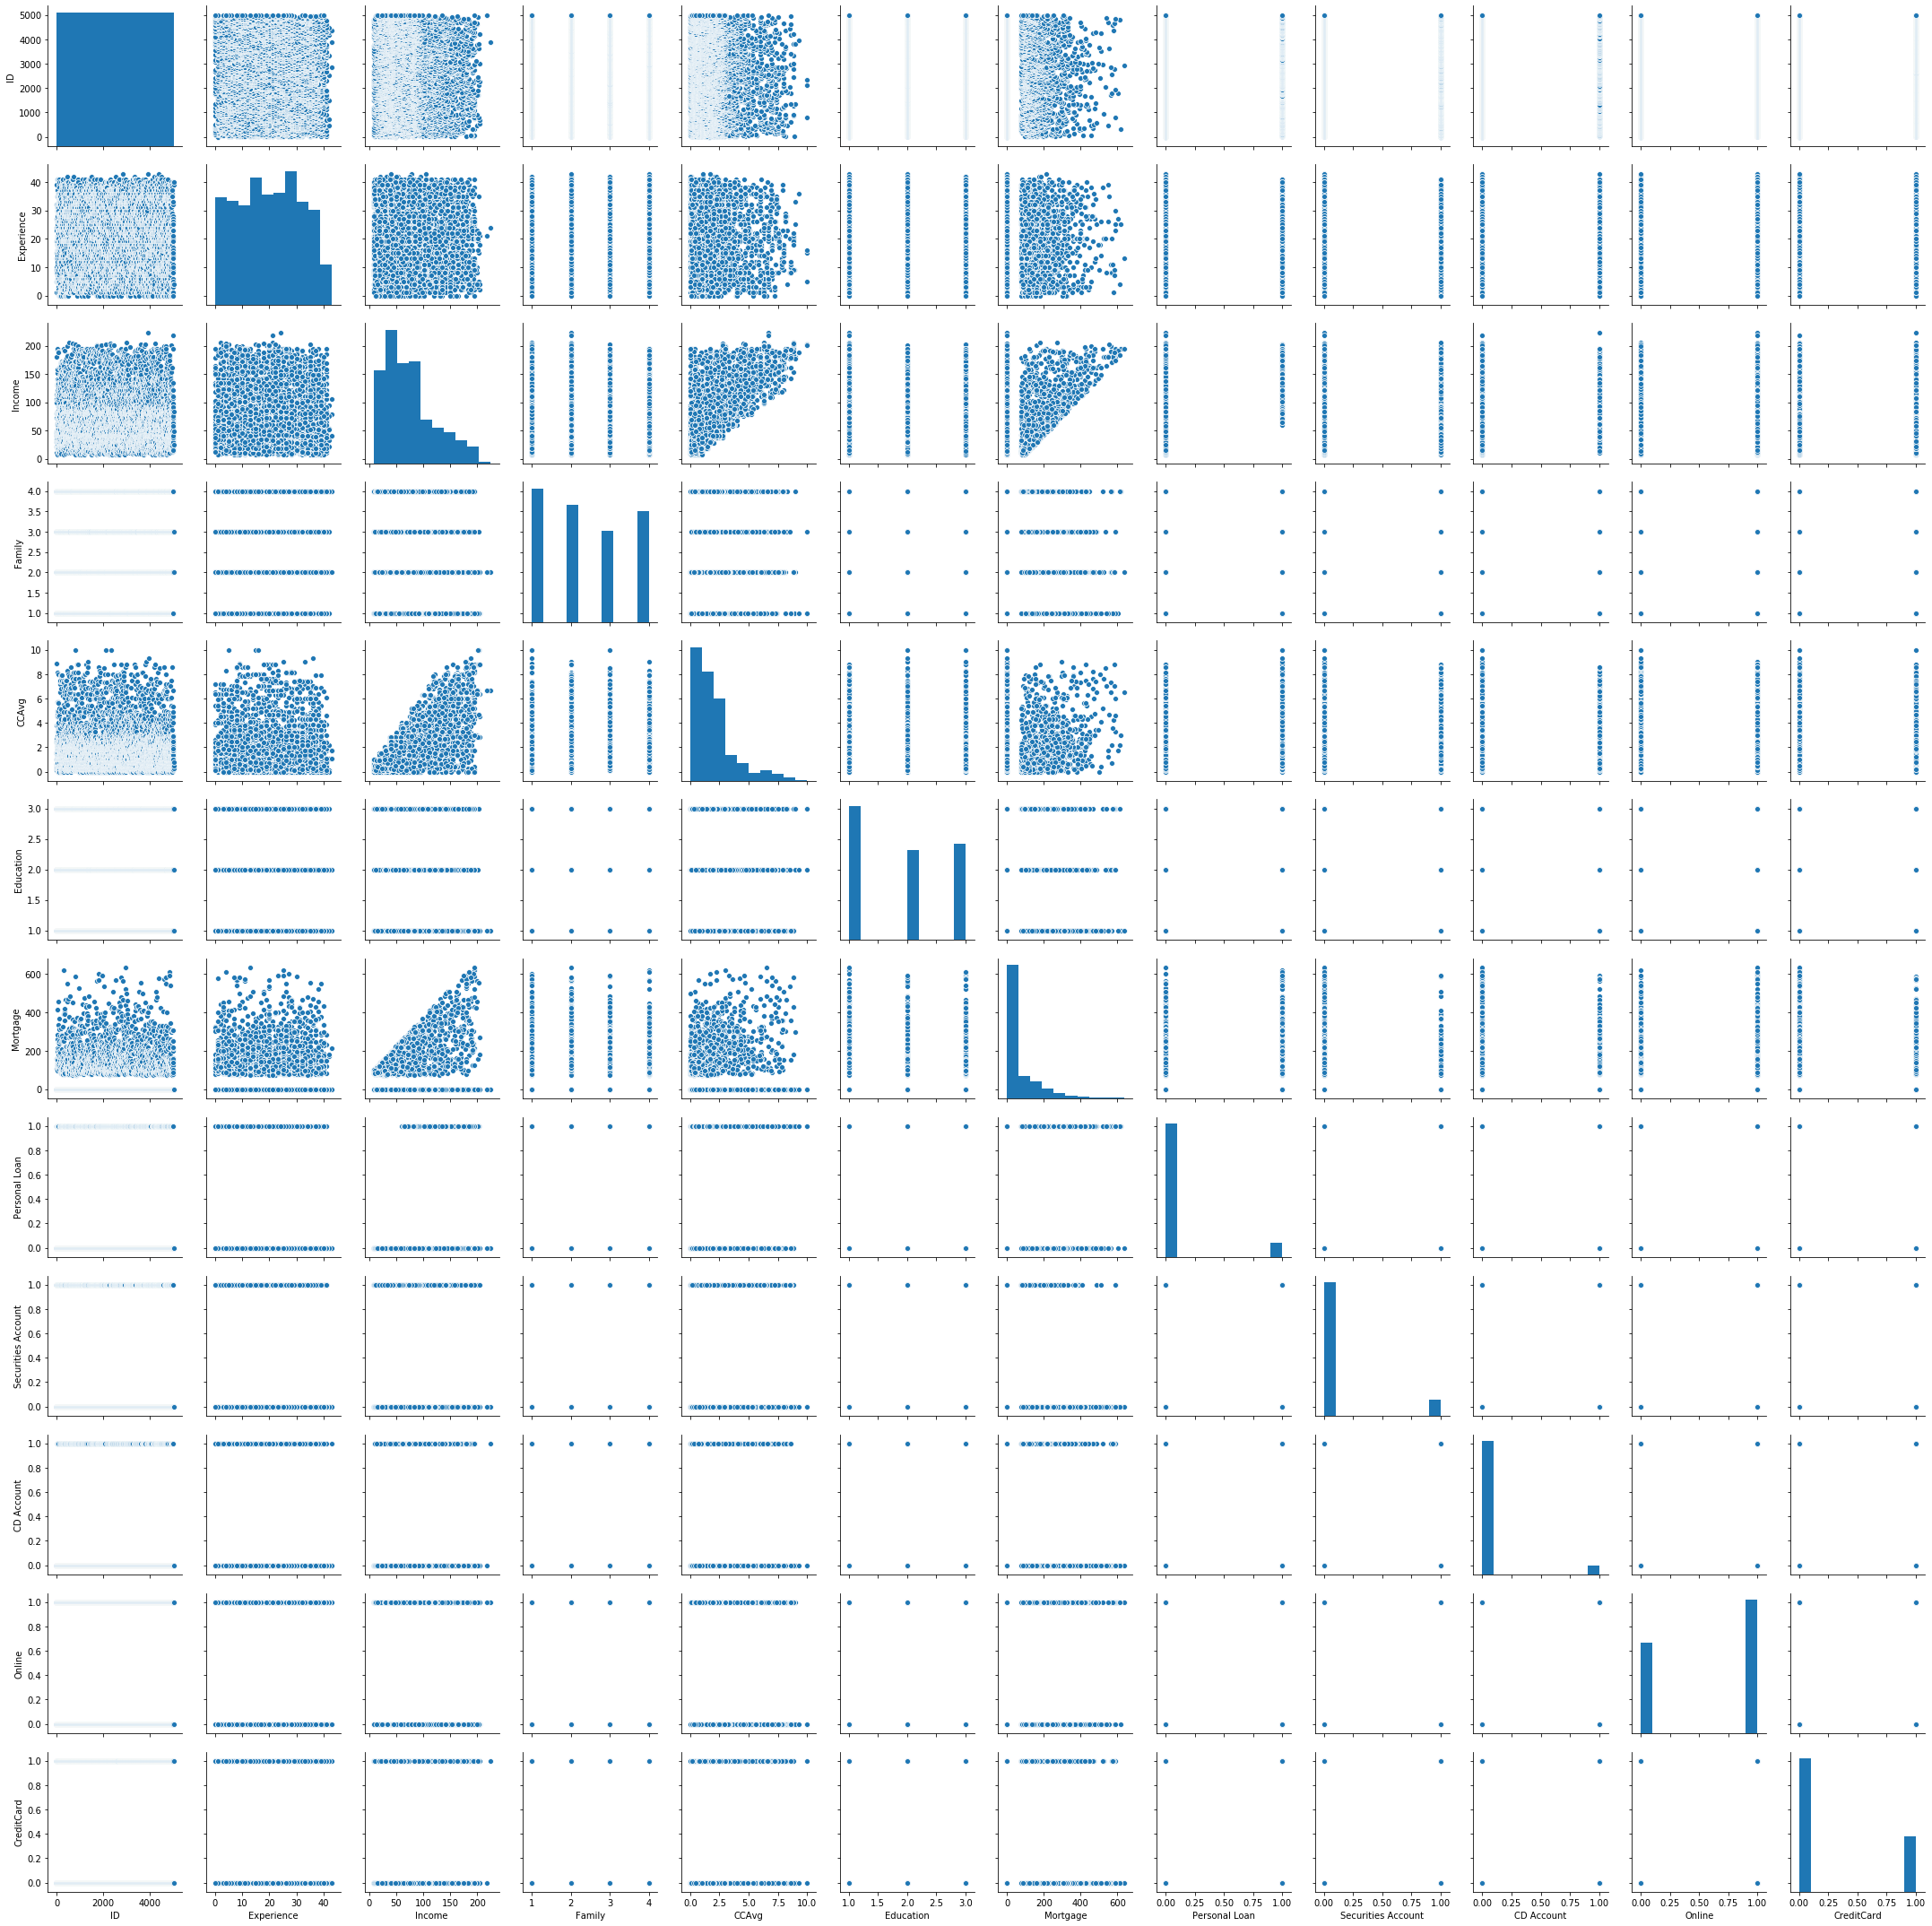

In [94]:
sns.pairplot(therabnk_df)

In [ ]:
#Naïve Bayes Model

In [101]:
array = therabnk_df.values
X = array[:,0:11] 
Y = array[:,11]   

In [102]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

In [104]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [105]:
expected = y_train
predicted = model.predict(X_train)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

         0.0       0.74      0.98      0.84      2479
         1.0       0.77      0.16      0.26      1021

    accuracy                           0.74      3500
   macro avg       0.76      0.57      0.55      3500
weighted avg       0.75      0.74      0.67      3500

[[2432   47]
 [ 861  160]]


In [106]:
2432/(2432+47)

0.9810407422347721

In [107]:
2432/(2432+861)

0.7385362890980869

In [108]:
861/(861+160)

0.8432908912830558

In [109]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

         0.0       0.74      0.99      0.84      1051
         1.0       0.84      0.18      0.29       449

    accuracy                           0.74      1500
   macro avg       0.79      0.58      0.57      1500
weighted avg       0.77      0.74      0.68      1500

[[1036   15]
 [ 369   80]]


In [110]:
1036/(1036+15)

0.9857278782112274

In [111]:
369/(369+80)

0.821826280623608

In [112]:
15/(15+80)

0.15789473684210525

In [113]:
1036/(1036+369)

0.7373665480427046

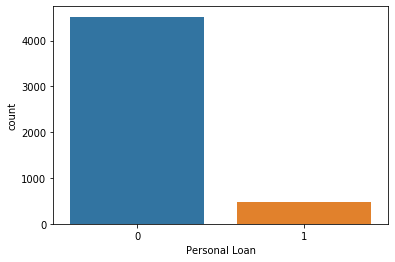

In [118]:
sns.countplot(x='Personal Loan',data=therabnk_df)

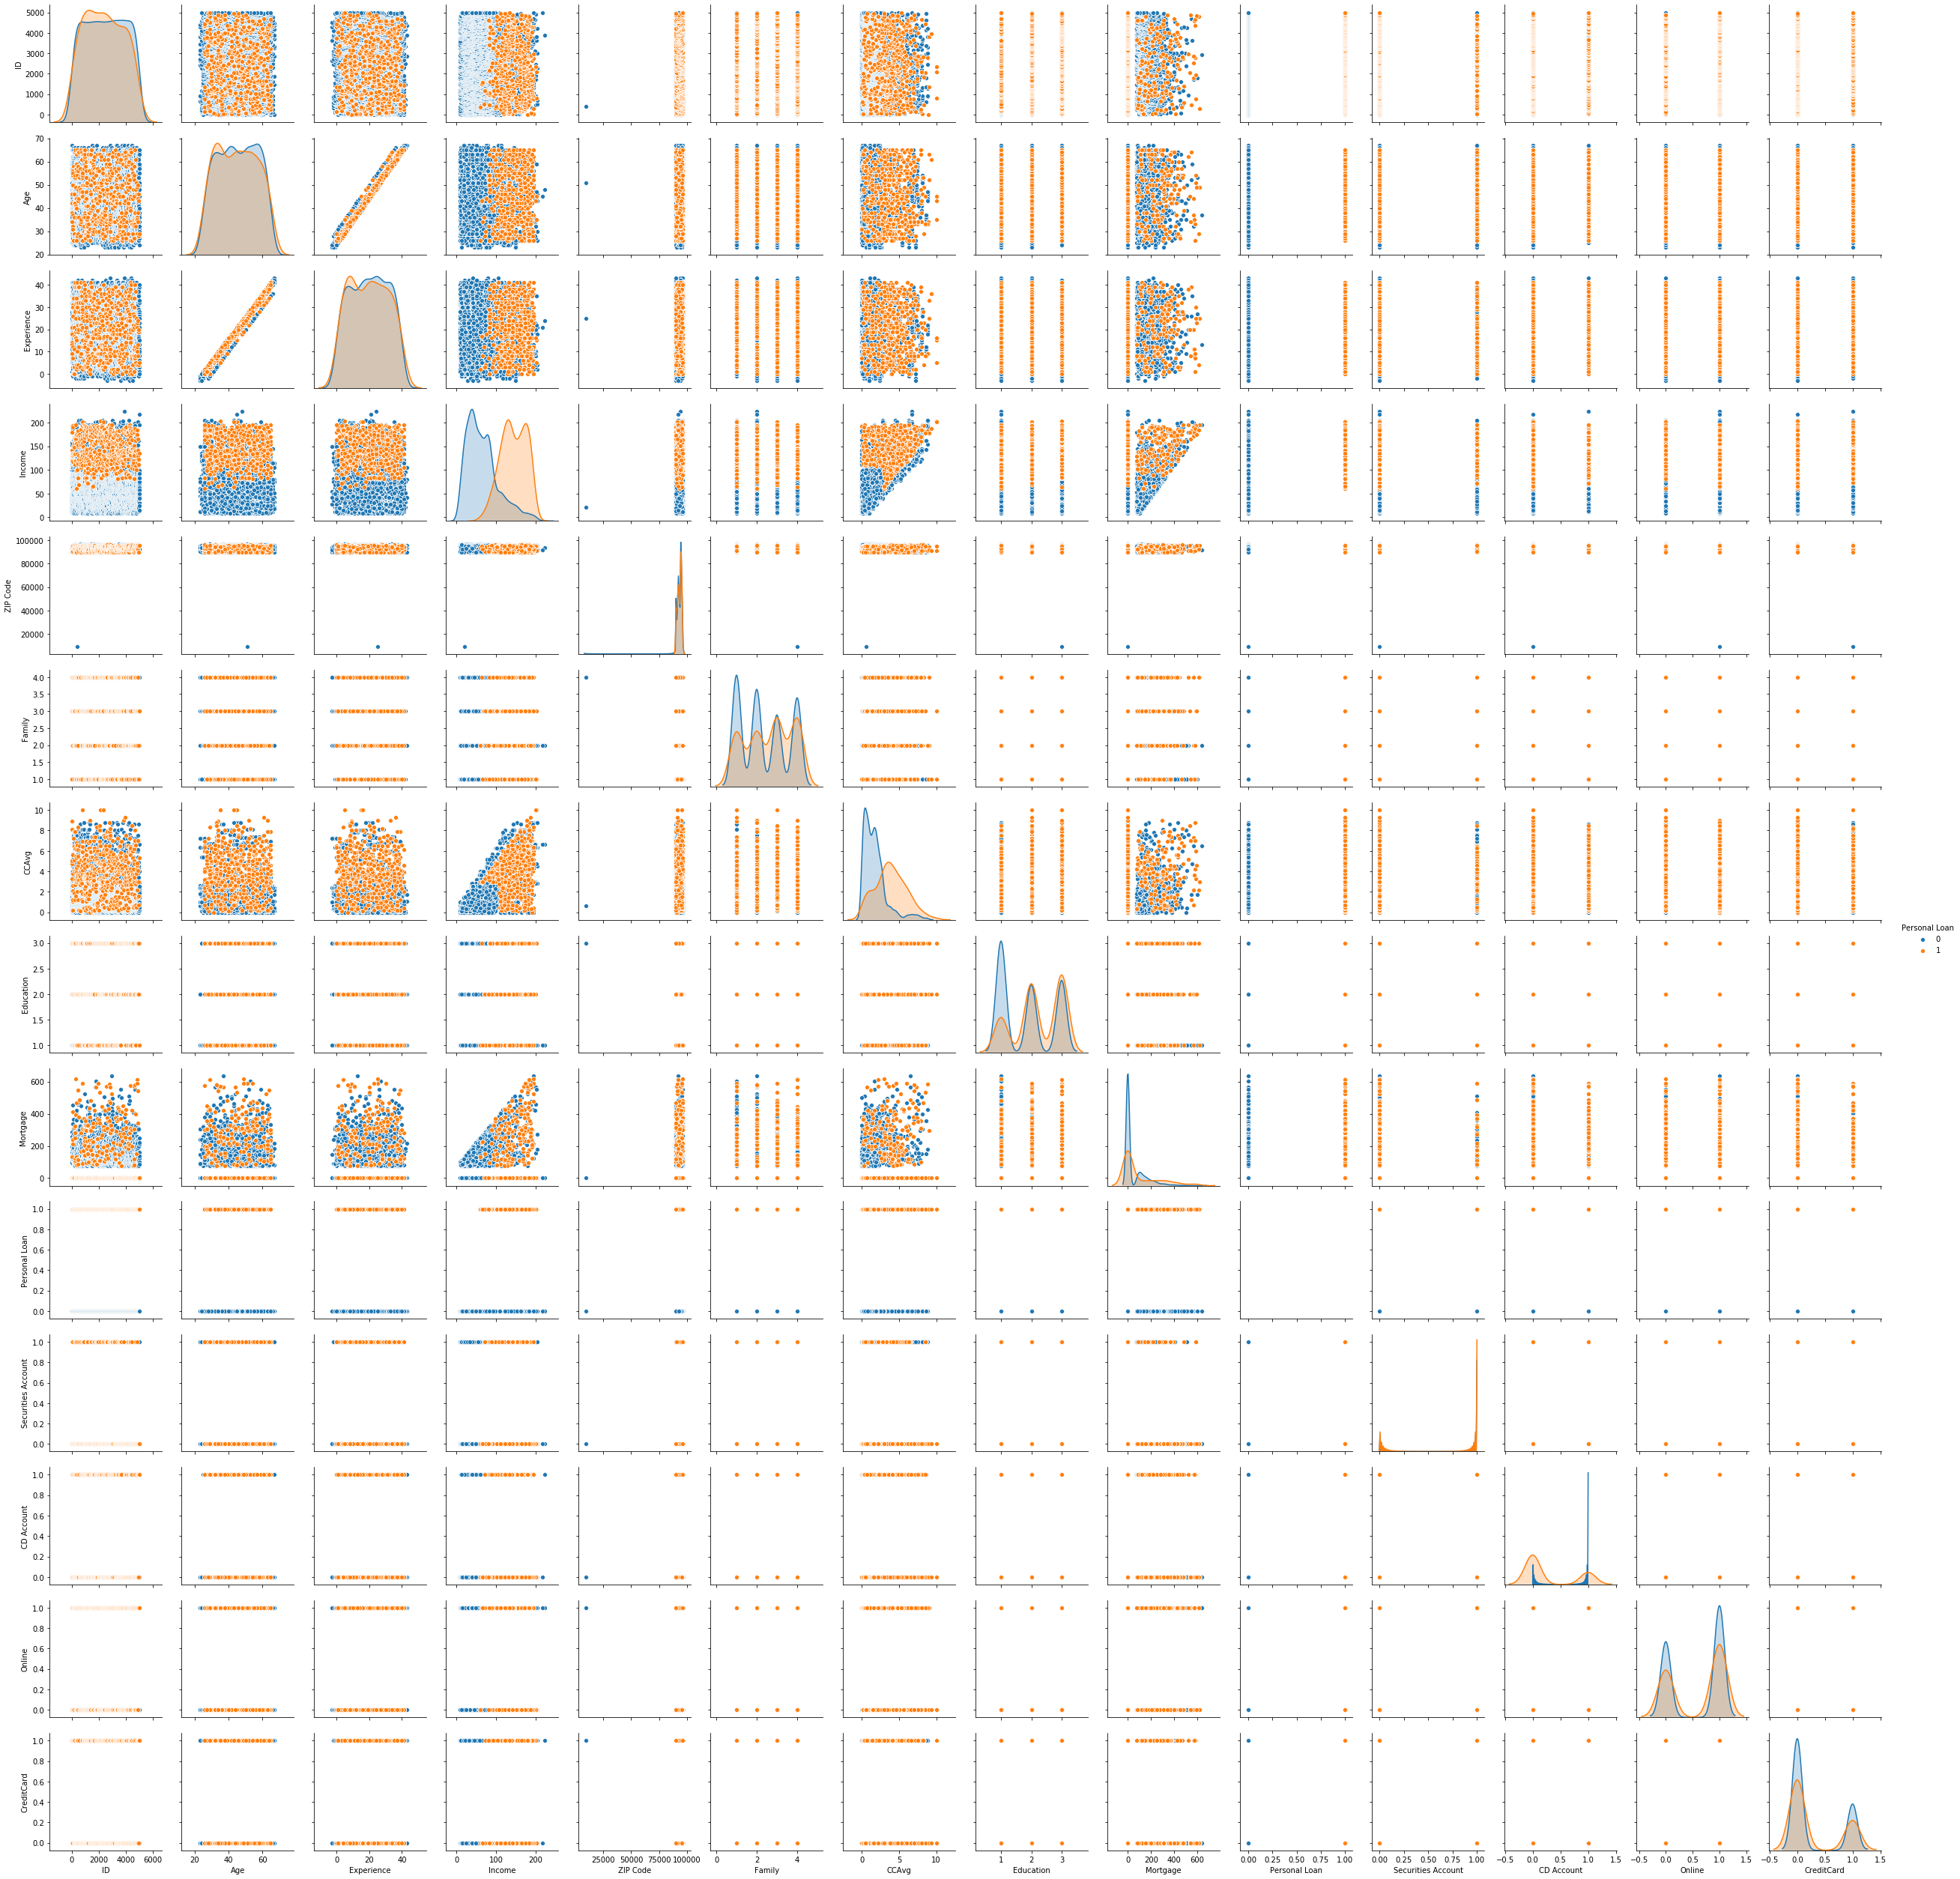

In [123]:
therabnk_df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
therabnk_df=sns.pairplot(therabnk_df,hue='Personal Loan')
therabnk_df

In [ ]:
#Coclusion:
#Naive Bayes analysis is better as it gives result more clearly. 
#KNN is comparatively slower than Logistic Regression. KNN supports non-linear solutions where LR supports only linear solutions. 
#LR can derive confidence level (about its prediction), whereas KNN can only output the labels.
# Naive Bayes is an eager learning classifier and it is much faster than K-NN. Thus, it could be used for prediction in real time.
#It assumes conditional independence between the features and uses a maximum likelihood hypothesis. 
#The best part with this classifier is that, it learns over time.
#Naïve Bayes assumes all the features to be conditionally independent. 
#So, if some of the features are in fact dependent on each other (in case of a large feature space), the prediction might be poor.
#Logistic regression splits feature space linearly, and typically works reasonably well even when some of the variables are correlated.

#However, in this cae of data set there is not significance correlation betwwen data and we have removed the data label with siginificant correlation 